  Using cached pymannkendall-1.4.3-py3-none-any.whl.metadata (14 kB)
Using cached pymannkendall-1.4.3-py3-none-any.whl (12 kB)


/tmp/ipykernel_484/285134131.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Site', y='CH4', data=df, inner='quartile', palette='YlGnBu')


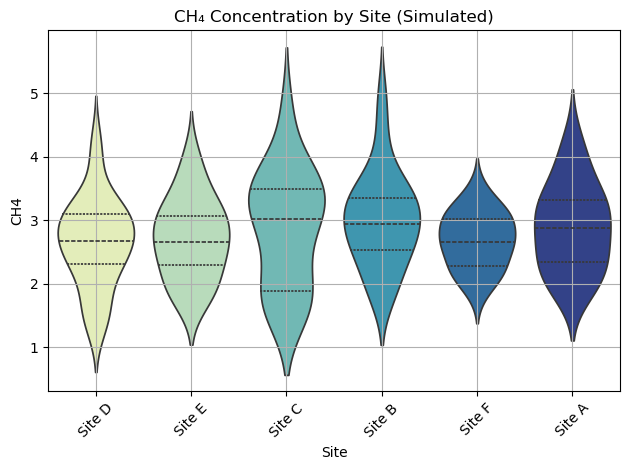

📈 Mann-Kendall Trend Test Result:
Trend: no trend
p-value: 0.1953
Tau: -0.0801


In [2]:
!pip install pymannkendall
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymannkendall as mk

# Simulate data
np.random.seed(42)
sites = ['Site A', 'Site B', 'Site C', 'Site D', 'Site E', 'Site F']
tides = ['Morning Low', 'Afternoon High', 'Evening Low']
n_samples = 120

df = pd.DataFrame({
    'Site': np.random.choice(sites, size=n_samples),
    'Tide': np.random.choice(tides, size=n_samples),
    'CH4': np.random.normal(loc=2.5, scale=0.7, size=n_samples),
    'CH3Cl': np.random.normal(loc=1.8, scale=0.4, size=n_samples),
    'CH3Br': np.random.normal(loc=1.1, scale=0.3, size=n_samples),
    'CH3I': np.random.normal(loc=0.9, scale=0.2, size=n_samples),
    'Latitude': np.random.uniform(low=34.0, high=34.5, size=n_samples)
})

# Introduce slight tide effect
df.loc[df['Tide'] == 'Afternoon High', 'CH4'] += 0.5

# Violin plot of CH₄ concentration by site
sns.violinplot(x='Site', y='CH4', data=df, inner='quartile', palette='YlGnBu')
plt.title("CH₄ Concentration by Site (Simulated)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Mann-Kendall trend test on CH₄ values (simulating time trend)
df_sorted = df.sort_values(by='Latitude')  # fake proxy for time
mk_result = mk.original_test(df_sorted['CH4'])

print("📈 Mann-Kendall Trend Test Result:")
print(f"Trend: {mk_result.trend}")
print(f"p-value: {mk_result.p:.4f}")
print(f"Tau: {mk_result.Tau:.4f}")
